In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
N, D_in, H, D_out = 2, 100, 50, 1

In [24]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)
print(x) #들어갈 데이터
print(y) #정답지

(2, 100)
(2, 1)
[[-2.24778614e-01  5.82107953e-01  1.32663249e+00 -1.15525866e+00
   7.85033414e-01  2.04680310e+00  1.09179699e+00  8.02205168e-01
  -1.57089613e+00  8.88184969e-01  1.41500132e+00 -4.15701942e-01
  -3.07897181e-01  1.78375889e+00 -6.62638905e-01 -1.65863641e-01
   2.33078360e+00 -5.36650701e-01  1.27043564e+00 -1.49439785e-01
  -4.76234534e-02 -7.17316261e-01  2.18913721e-01 -1.33918498e-02
   1.42978871e+00 -1.46680007e+00 -2.52787998e-01 -2.38337591e-01
  -7.01017177e-01  8.80356807e-01 -6.46554130e-01 -9.70233016e-02
  -6.91774982e-01  6.96910068e-03 -1.72637861e+00  1.82488111e+00
   1.52425741e+00 -9.30970537e-01  2.56089143e-01  3.29333347e-01
   1.17457737e+00  5.70117699e-01 -9.89706136e-01 -6.58500670e-01
   1.68493657e-01  4.08777531e-01  4.49692333e-01 -3.68952870e-01
   1.68980756e+00  5.56110801e-01 -6.01969824e-01  1.22647856e-01
  -4.05218184e-01 -3.16182903e-01 -8.17495838e-02 -5.46732288e-02
   1.71661512e+00 -7.16671362e-02 -8.52268049e-01  9.5666388

In [25]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [26]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(500):
  h = x.dot(w1) #dot 행렬곱
  h_relu = np.maximum(h, 0)
  y_pred = h_relu.dot(w2) # y의 예측값
  y_pred_list.append(y_pred[0][0])

  loss = np.square(y_pred - y).sum() #square : 제곱
  loss_list.append(loss)
  print(t, loss)

  grad_y_pred = 2.0 * (y_pred - y)
  grad_w2 = h_relu.T.dot(grad_y_pred)
  grad_h_relu = grad_y_pred.dot(w2.T)
  grad_h = grad_h_relu.copy()
  grad_h[h < 0] = 0
  grad_w1 = x.T.dot(grad_h)

  w1 -= learning_rate * grad_w1
  w2 -= learning_rate * grad_w2

print('=====================')
print(y)



0 5936.600957875819
1 5736.03269750295
2 5542.362300112249
3 5355.3457748804685
4 5174.748187074605
5 5000.343294553152
6 4831.913200590498
7 4669.2480221859805
8 4512.145573067826
9 4360.411060648698
10 4213.856796232296
11 4072.3019178106647
12 3935.5721248297027
13 3803.4994243353026
14 3675.9218879457385
15 3552.6834191267203
16 3433.6335302743687
17 3318.627129138851
18 3207.524314146425
19 3100.1901782018977
20 2996.4946205758415
21 2896.3121665018793
22 2799.521794129286
23 2706.006768494759
24 2615.6544821946986
25 2528.356302455794
26 2444.0074243173376
27 2362.5067296530974
28 2283.7566517746645
29 2207.6630453708235
30 2134.135061549962
31 2063.085027764013
32 1994.4283324032965
33 1928.0833138619291
34 1863.9711538832416
35 1802.015775003696
36 1742.143741922588
37 1684.2841666330016
38 1628.3686171572217
39 1574.3310297371524
40 1522.1076243372802
41 1471.636823324279
42 1422.8591731936165
43 1375.717269219445
44 1330.1556829096214
45 1286.120892153071
46 1243.561213951777

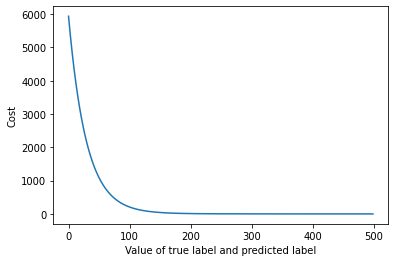

In [27]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()